### Histogramas

Histogramas é um tipo de gráfico que nos ajuda a visualizar nossos dados em intervalos para que consigamos enxergar se os valores estão mais concentrados ou ausentes em determinado conjunto.

Os histogramas dão uma ideia aproximada da densidade de distribuição subjacente dos dados e muitas vezes para a estimativa de densidade.

In [1]:
import pandas as pd

BASE = "../datasets/HR-Employee-Attrition.csv"

df = pd.read_csv(BASE)


# Limpando a base de colunas com valores não variam e removendo a
# coluna de identificação (EmployeeNumber)

df = df.drop("EmployeeNumber", axis=1)

for c in df.columns:
    column = df[c]
    if (column.nunique() <= 1):
        print(f"Removendo coluna {c}") 
        df = df.drop(c, axis=1)


# Separando nossas colunas por variáveis categóricas ordenadas e 
# não ordernadas


# Colunas que são categóricas e não ordenadas
columns_categorical_not_ordered = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Colunas que são categóricas e ordernadas
columns_categorical_ordered = [
    'Education',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance',
    'JobInvolvement'
]

target_column = ['Attrition']


numeric_columns = [
    column
    for column in df.columns
    if column not in (columns_categorical_ordered + columns_categorical_not_ordered + target_column)
]


# Convertendo nossas colunas não ordernadas para o tipo category
### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)
for column in columns_categorical_not_ordered:
    df[column] = df[column].astype("category")

Removendo coluna EmployeeCount
Removendo coluna Over18
Removendo coluna StandardHours


In [14]:
df.groupby("Gender", observed=True)["Age"].value_counts(bins=10).sort_index()


# Por padrão ao separarmos os dados em conjuntos ele vai retornar o intervalo
#onde há mais registros concentrados, utilizamos o .sort_index() para que ele
#organize nossos registros pelo index de forma ascendente, sendo o index a 
#descrição do intervalo de dados que aquele conjunto representa

Gender  Age                       
Female  (17.956999999999997, 22.2]     25
        (22.2, 26.4]                   32
        (26.4, 30.6]                   89
        (30.6, 34.8]                  108
        (34.8, 39.0]                  117
        (39.0, 43.2]                   69
        (43.2, 47.4]                   56
        (47.4, 51.6]                   35
        (51.6, 55.8]                   36
        (55.8, 60.0]                   21
Male    (17.956999999999997, 22.2]     32
        (22.2, 26.4]                   73
        (26.4, 30.6]                  135
        (30.6, 34.8]                  157
        (34.8, 39.0]                  180
        (39.0, 43.2]                  106
        (43.2, 47.4]                   75
        (47.4, 51.6]                   57
        (51.6, 55.8]                   41
        (55.8, 60.0]                   26
Name: count, dtype: int64

### Visualizando no formato de porcentagem

In [17]:
df.groupby("Gender", observed=True)["Age"].value_counts(bins=10, normalize=True).mul(100).round(1).sort_index()

# .mul(100) vai multiplicar nossos valores porcentuais por 100 (por padrão o normalize traz entre 0 e 1)
#rond(1) vai limitar a uma casa decimal

Gender  Age                       
Female  (17.956999999999997, 22.2]     4.3
        (22.2, 26.4]                   5.4
        (26.4, 30.6]                  15.1
        (30.6, 34.8]                  18.4
        (34.8, 39.0]                  19.9
        (39.0, 43.2]                  11.7
        (43.2, 47.4]                   9.5
        (47.4, 51.6]                   6.0
        (51.6, 55.8]                   6.1
        (55.8, 60.0]                   3.6
Male    (17.956999999999997, 22.2]     3.6
        (22.2, 26.4]                   8.3
        (26.4, 30.6]                  15.3
        (30.6, 34.8]                  17.8
        (34.8, 39.0]                  20.4
        (39.0, 43.2]                  12.0
        (43.2, 47.4]                   8.5
        (47.4, 51.6]                   6.5
        (51.6, 55.8]                   4.6
        (55.8, 60.0]                   2.9
Name: proportion, dtype: float64

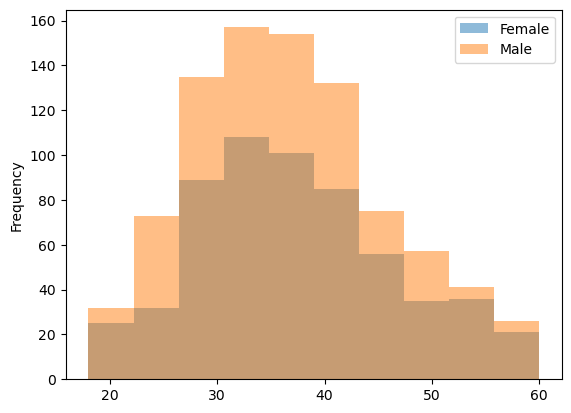

In [26]:
df.groupby("Gender", observed=True)["Age"].plot(kind="hist", legend=True, alpha=0.5);


# O argumento "alpha" é quem vai determinar o nível de transparencia dos objetos do gráfico
#(objetos = barras do gráfico), quanto maior o valor menos transparente a cor.

### Gerando o histograma sem o .groupby

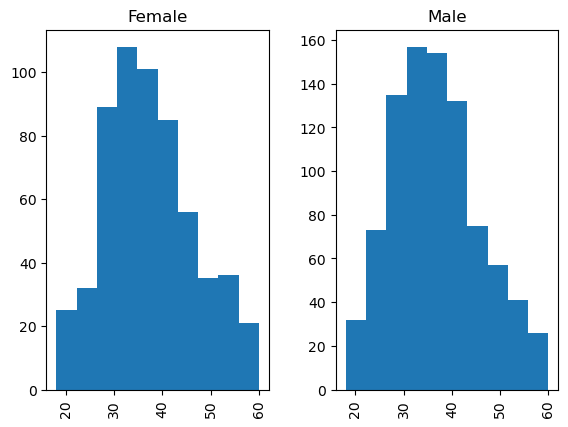

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df.hist(column="Age", by="Gender");

O gráfico da direita representando o histograma do gênero masculino tem uma escala maior e isso faz sentido pois os homens são maiorias neste dataset, se quisermos que ambos os histograms compartilhem da mesma escala podemos utilizar o `sharey` (Compartilhe o eixo y): 

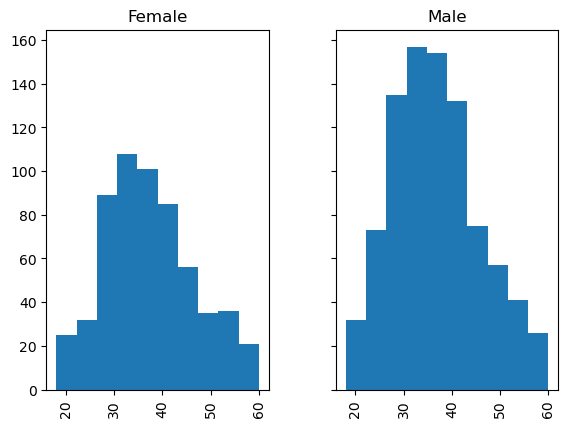

In [41]:
df.hist(column="Age", by="Gender", sharey=True);